# Sheet 1: Solution

In [2]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=5,repr.plot.height=5) # this is just to render graphics as png and not as svg, and to adjust the default size

# Exercise 1: Starting with R

The simulation can be done as follows.

In [9]:
N <- 1000
Y <- rbinom(N, 1, 0.5)
print(Y)
mu <- c(0, 3)[Y + 1]
print(mu)
X <- rnorm(N, mu, 1)
print(X)
mean(X[Y==1])
sd(X[Y==1])

   [1] 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0
  [38] 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0
  [75] 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 [112] 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1
 [149] 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 [186] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 [223] 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0
 [260] 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 [297] 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 [334] 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0
 [371] 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 [408] 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0
 [445] 0 1 0 0 0 0 1 0 0 0 1

[1] 2.955125

[1] 1.024733

This is just one way, where we use that <b>rnorm</b> take a
vector as mean values.

The density plot shows the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups.

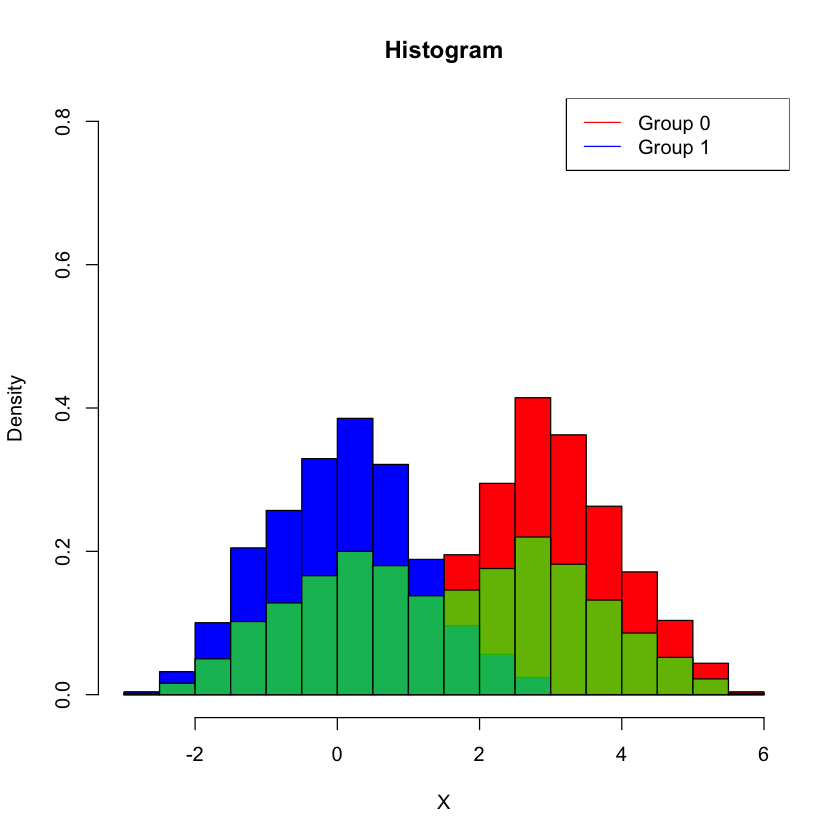

In [10]:
breaks <- pretty(X, 12)
hist(X[Y == 1], breaks, freq = FALSE, ylim = c(0, 0.8), 
     xlim = range(breaks), col = "red", main = "Histogram", 
     xlab = "X")
hist(X[Y == 0], breaks, freq = FALSE, col = "blue", add = TRUE)
hist(X, breaks, freq = FALSE, add = TRUE, col = rgb(0, 1, 0, 0.7))
legend("topright",lty=1,col=c("red","blue"),legend = c("Group 0 ", "Group 1 "),text.width=2)

We then compute, for a grid of threshold values, the average
prediction error for each of these threshold values. This is done
using the <b>sapply</b> function. Regarding the theoretical
computation we note that, with $\Phi_{\mu}$ the cumulative distribution function for the normal
distribution with mean $\mu$ and variance 1, 
\begin{eqnarray*}
\textrm{EPE}(f_t) & = &  P(X < t \mid Y = 1)/2 +  P(X
\geq t \mid Y = 0)/2 \\
%& = & 0.5 \int_{-\infty}^t \phi_3(t) \mathrm{d} t + 0.5 \int_t^{\infty} \phi_0(t) \mathrm{d} t \\
& = & (\Phi_3(t) + 1 - \Phi_0(t))/2.
\end{eqnarray*}

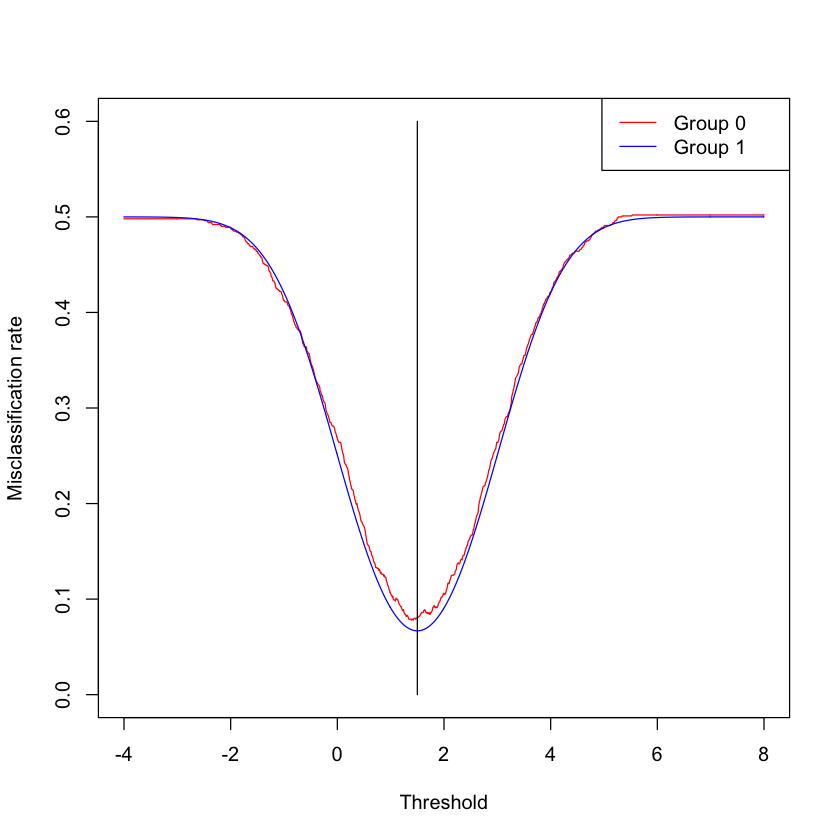

In [11]:
thres <- seq(-4, 8, 0.01) 
aveMisclas <- function(t) mean((X >= t) != Y)
misclasEmp <- sapply(thres, aveMisclas)
theoMisclas <- function(t) (pnorm(t, 3, 1) + 1 - pnorm(t))/2
misclasTheo <- theoMisclas(thres)
plot(thres, misclasEmp, type = "l", col = "red", ylim = c(0, 0.6),
     xlab = "Threshold", ylab = "Misclassification rate")
lines(thres, misclasTheo, type = "l", col = "blue")
lines(c(1.5, 1.5), c(0, 0.6))
    legend("topright",lty=1,col=c("red","blue"),legend = c("Group 0 ", "Group 1 "),text.width=2)

Note: If you set N = 1000 instead of 100, numerical solution will fit very well to the theorectical solution.

## Exercise 2: Analysis of Data on Hepatitis C

In [2]:
HepCevol <- read.table("HepCevol.txt")
head(HepCevol)

segment,pos,nucleotide.77,nucleotide.90
A,42,G,A
A,275,C,T
A,348,C,T
A,447,A,G
A,556,G,A
A,557,C,T


First we write a function that, given $\alpha$ and time value, returns the matrix of
transition probabilities. The default is time = 1 to make the function work even if we don't
specify time.

In [4]:
tpJC <- function(alpha, time = 1) {
z <- -4 * alpha * time
xx <- 0.25 + 0.75 * exp(z)
xy <- 0.25 - 0.25 * exp(z)
tp <- matrix(xy, ncol = 4, nrow = 4)
diag(tp) <- xx
return(tp)
}
print(tpJC(0.0005,1))

             [,1]         [,2]         [,3]         [,4]
[1,] 0.9985014990 0.0004995003 0.0004995003 0.0004995003
[2,] 0.0004995003 0.9985014990 0.0004995003 0.0004995003
[3,] 0.0004995003 0.0004995003 0.9985014990 0.0004995003
[4,] 0.0004995003 0.0004995003 0.0004995003 0.9985014990


The minus log likelihood function is
$$ l_z (t, p, \alpha) = -log \mathcal L_z (t,p,a) = - \sum_{i=1}^n \log p(x_i) - \sum_{i =1}^n \log P_\alpha^t (x_i, y_i),$$
where $z = \{ (x_i, y_i) \}_{i =1}^n$ and $\mathcal L_z$ is the likelihood function.
Observe that the first term depends upon $p$ only and the second term on $(t, \alpha)$ only. To find
the MLE we can minimize each term separately over the separate parameters.

We implement the computation of the minus-log-likelihood function from a tabulation
of the number of transitions. Note that this is a one line implementation
of a generic likelihood computation, where the transition probabilities can be
given as any function of any (univariate or multivariate) parameter theta. The default is
that tp are computed using tpJC as implemented above.

In [5]:
mll <- function(theta, x , tp = tpJC, ...)
- sum(log(tp(theta, ...)) * x)

To calculate the MLE we introduce $n(x; y)$ as the number of observed mutations of $x$ to $y$, and rewrite 
$$ \hat l_z (t, p, \alpha) = -\sum_{x,y} n(x,y) \log P_\alpha^t (t,p,a).$$ To estimate $\alpha$ using MLE we need to minimize this function as a function of $\alpha,$ using basic calculus. Eventually, we obtain the unique maximum likelihood estimator to $\hat \alpha$ given as
$$ \hat \alpha = \frac{1}{4t} \log \frac{3(n_1+n_2)}{3 n_1 - n_2} = \frac{1}{4t} \log \frac{3n}{3 n_1 - n_2}$$
with $n_1 = \sum_x n(x,x)$ and $n_2 = \sum_{x \neq y} n(x,y)$ and if and only if $3n_1>n_2.$

We implement the computation of the MLE for the given probabilistic model based on a tabulation of the
transitions.

In [6]:
alphahat <- function(x, t){
n1 <- sum(diag(x))
n2 <- sum(x) - n1
if(3 * n1 > n2) {alpha <- log(3 * (n1 + n2)/(3 * n1 - n2)) / (4 * t)
} else {
alpha <- Inf
}
return(alpha)
}

Then we tabulate our data for the three segments and compute the MLEs.

In [7]:
xSegA <- table(HepCevol[HepCevol$segment == "A", c(4, 3)])
diag(xSegA) <- c(470, 761, 746, 555)
print(xSegA)
xSegB <- table(HepCevol[HepCevol$segment == "B", c(4, 3)])
diag(xSegB) <- c(252, 389, 347, 271)
print(xSegB)
xSegC <- table(HepCevol[HepCevol$segment == "C", c(4, 3)])
diag(xSegC) <- c(230, 299, 282, 198)
print(xSegC)
alphaHat <- c(alphahat(xSegA, 13),
alphahat(xSegB, 13),
alphahat(xSegC, 13))
print(alphaHat)

             nucleotide.77
nucleotide.90   A   C   G   T
            A 470   4  13   3
            C   1 761   3  19
            G  11   1 746   1
            T   1  20   1 555
             nucleotide.77
nucleotide.90   A   C   G   T
            A 252   1   1   2
            C   0 389   1   6
            G   5   0 347   0
            T   0   8   1 271
             nucleotide.77
nucleotide.90   A   C   G   T
            A 230   1   4   1
            C   1 299   0   3
            G   2   2 282   1
            T   0   5   0 198
[1] 0.0007819686 0.0005058358 0.0005049393


Make a Plot

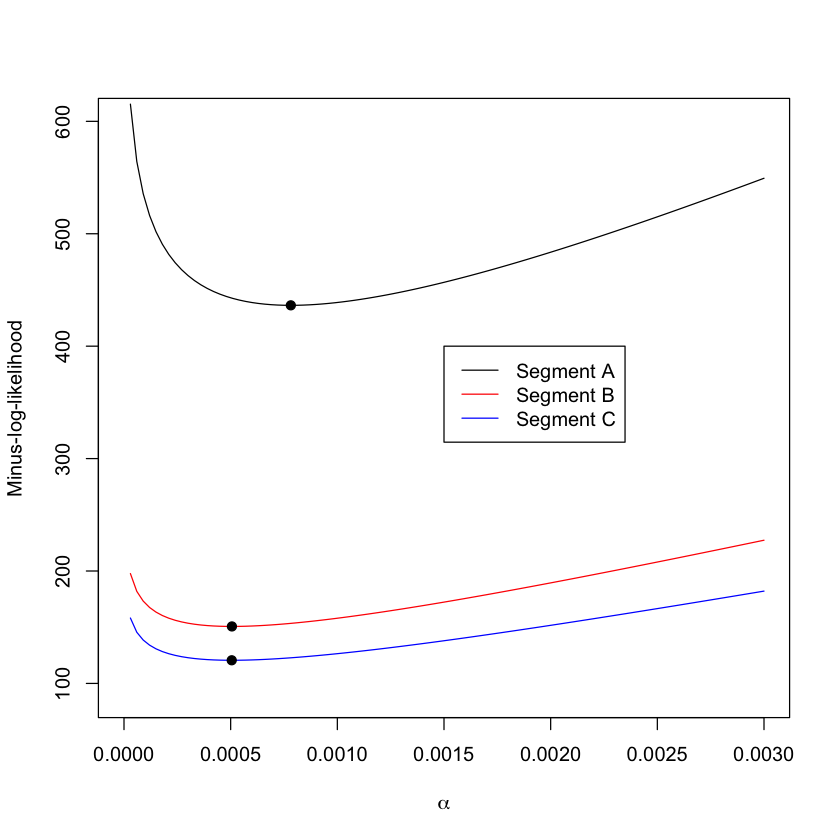

In [8]:
mll <- Vectorize(mll, "theta")
curve(mll(x, xSegA, time = 13), 0, 0.003, ylim = c(90, 600),
ylab = "Minus-log-likelihood", xlab = expression(alpha)
)
curve(mll(x, xSegB, time = 13), 0, 0.003, col = "red", add = TRUE)
curve(mll(x, xSegC, time = 13), 0, 0.003, col = "blue", add = TRUE)
legend(0.0015, 400,
legend = c("Segment A", "Segment B", "Segment C"),
col = c("black", "red", "blue"),
lty = c(1, 1, 1)
)
points(alphaHat,
c(mll(alphaHat[1], xSegA, time = 13),
mll(alphaHat[2], xSegB, time = 13),
mll(alphaHat[3], xSegC, time = 13)),
pch = 19)